<a href="https://colab.research.google.com/github/HashirAziz/100-Days-of-Bytewise/blob/main/Cat_Vs_Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:55<00:00, 22.0MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  # Import Sequential from the correct submodule
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [18]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
#Normalize
def process(image, label):
  image=tf.cast(image/255. , tf.float32)
  return image, label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [20]:
#creating a cnn model
model=Sequential()
#convolution layer
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
#model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
#model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 76ms/step - accuracy: 0.6033 - loss: 0.6934 - val_accuracy: 0.7282 - val_loss: 0.5538
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.7491 - loss: 0.5081 - val_accuracy: 0.7646 - val_loss: 0.5015
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.8215 - loss: 0.3967 - val_accuracy: 0.7762 - val_loss: 0.5727
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8857 - loss: 0.2654 - val_accuracy: 0.7748 - val_loss: 0.9149
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.9466 - loss: 0.1338 - val_accuracy: 0.7740 - val_loss: 0.9309
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9718 - loss: 0.0772 - val_accuracy: 0.7694 - val_loss: 1.1662
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9777 - loss: 0.0664 - val_accuracy: 0.7734 - val_loss: 1.0614
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 74ms/step - accuracy: 0.9825 - loss: 0.0496 - 

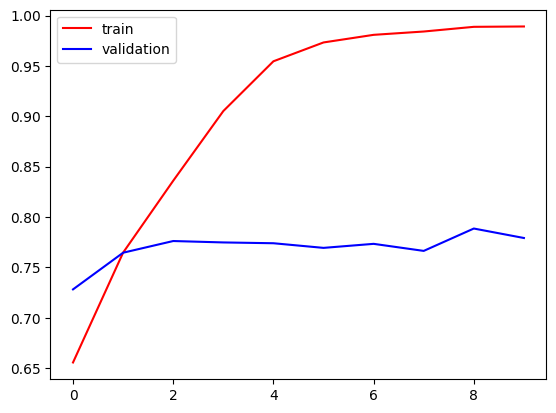

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [26]:
import cv2
import numpy as np
img=cv2.imread('/content/dog.jpg')
img=cv2.resize(img, (256, 256))
img=np.array(img)

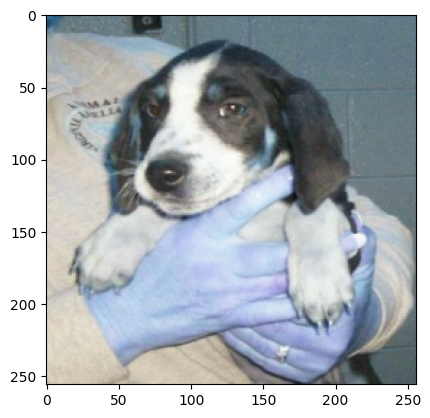

In [27]:
plt.imshow(img)

In [28]:
test_img=img.reshape((1, 256, 256, 3))

In [29]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


array([[1.]], dtype=float32)

In [30]:
img=cv2.imread('/content/Cat.jpg')
img=cv2.resize(img, (256, 256))
img=np.array(img)

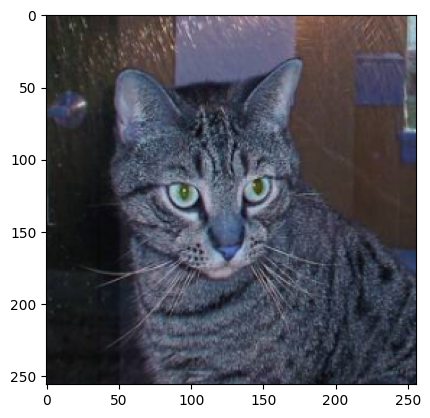

In [31]:
plt.imshow(img)

In [32]:
test_img=img.reshape((1, 256, 256, 3))

In [33]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)